* https://pypi.org/project/python-coinmarketcap/
* https://github.com/rsz44/python-coinmarketcap
* https://www.youtube.com/watch?v=uatXdBQ78AE
* https://medium.com/zengo/dune-analytics-introduction-tutorial-with-examples-d2c764600d6
* https://defillama.com/

* https://dune.xyz/shadow/Olympus-(OHM)
* https://dune.xyz/Cujowolf/Klima-DAO
* https://nomics.com/assets/ohm-olympus/history/3

In [8]:
import numpy as np
import pandas as pd
import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt

In [9]:
superscript_map = {"ic": "ᶦᶜ", "fic": "ᶠᶦᶜ",
    "0": "⁰", "1": "¹", "2": "²", "3": "³", "4": "⁴", "5": "⁵", "6": "⁶",
    "7": "⁷", "8": "⁸", "9": "⁹", "a": "ᵃ", "b": "ᵇ", "c": "ᶜ", "d": "ᵈ",
    "e": "ᵉ", "f": "ᶠ", "g": "ᵍ", "h": "ʰ", "i": "ᶦ", "j": "ʲ", "k": "ᵏ",
    "l": "ˡ", "m": "ᵐ", "n": "ⁿ", "o": "ᵒ", "p": "ᵖ", "q": "۹", "r": "ʳ",
    "s": "ˢ", "t": "ᵗ", "u": "ᵘ", "v": "ᵛ", "w": "ʷ", "x": "ˣ", "y": "ʸ",
    "z": "ᶻ", "A": "ᴬ", "B": "ᴮ", "C": "ᶜ", "D": "ᴰ", "E": "ᴱ", "F": "ᶠ",
    "G": "ᴳ", "H": "ᴴ", "I": "ᴵ", "J": "ᴶ", "K": "ᴷ", "L": "ᴸ", "M": "ᴹ",
    "N": "ᴺ", "O": "ᴼ", "P": "ᴾ", "Q": "Q", "R": "ᴿ", "S": "ˢ", "T": "ᵀ",
    "U": "ᵁ", "V": "ⱽ", "W": "ᵂ", "X": "ˣ", "Y": "ʸ", "Z": "ᶻ", "+": "⁺",
    "-": "⁻", "=": "⁼", "(": "⁽", ")": "⁾"}

In [92]:
def formatDates(arr,date_format="%Y-%m-%d %H:%M"):
    return [datetime.datetime.strptime(d, date_format) for d in arr]

def stripCharacter(arr,c,r=''):
    return [e.replace(c, r) for e in arr]

def str2Float(arr):
    return [float(e) for e in arr]

def getDate(t, strt_date):
    return datetime.datetime.strptime(strt_date, "%Y-%m-%d") + datetime.timedelta(days=t) 

def x2Percent(x):
    return 100*(x - 1)

def percent2X(percent):
    return 1 + percent/100

In [11]:
eth_price = pd.read_csv('../resources/eth_daily.csv')
eth_price = eth_price.assign(time = stripCharacter(eth_price['time'].values,'/','-'))
eth_price = eth_price.assign(time = formatDates(eth_price['time'].values,date_format="%m-%d-%Y"))
for colnm in eth_price.columns[1:]:
    arr = np.array(stripCharacter(eth_price[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,'B'))
    arr = np.array(stripCharacter(arr,'M'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    eth_price[colnm] = arr
eth_price = eth_price.sort_values(by='time')
eth_price.reset_index(drop=True, inplace=True)

In [12]:
eth_price.to_csv('../resources/eth_historical.csv', index = False)


In [13]:
btc_price = pd.read_csv('../resources/btc_daily.csv')
btc_price = btc_price.assign(time = stripCharacter(btc_price['time'].values,'/','-'))
btc_price = btc_price.assign(time = formatDates(btc_price['time'].values,date_format="%m-%d-%Y"))
for colnm in btc_price.columns[1:]:
    arr = np.array(stripCharacter(btc_price[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,'B'))
    arr = np.array(stripCharacter(arr,'M'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    btc_price[colnm] = arr
btc_price = btc_price.sort_values(by='time')
btc_price.reset_index(drop=True, inplace=True)

In [14]:
daily_price = pd.read_csv('../resources/daily_price.csv')
daily_price = daily_price.assign(time = stripCharacter(daily_price['time'].values,'/','-'))
daily_price = daily_price.assign(time = formatDates(daily_price['time'].values,date_format="%m-%d-%Y"))
for colnm in daily_price.columns[1:]:
    arr = np.array(stripCharacter(daily_price[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,'M'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    daily_price[colnm] = arr
daily_price = daily_price.sort_values(by='time')
daily_price.reset_index(drop=True, inplace=True)

In [15]:
apy = pd.read_csv('../resources/apy.csv')
apy = apy.assign(time = formatDates(apy['time'].values))
apy = apy.assign(rebase = stripCharacter(apy['rebase'].values,'%'))
apy = apy.assign(apy = stripCharacter(apy['apy'].values,'%'))
apy = apy.assign(rebase = str2Float(apy['rebase'].values))
apy = apy.assign(apy = str2Float(apy['apy'].values))
apy = apy.sort_values(by='time')

In [16]:
holders = pd.read_csv('../resources/holders.csv')
holders = holders.assign(time = formatDates(holders['time'].values))
holders = holders.sort_values(by='time')

In [17]:
market_cap = pd.read_csv('../resources/market_cap.csv')
market_cap = market_cap.assign(time = formatDates(market_cap['time'].values))
market_cap = market_cap.sort_values(by='time')

In [18]:
SRT_DATE = datetime.datetime(2021, 3, 23)
END_DATE = datetime.datetime(2021, 11, 12)

df_market_cap = market_cap.loc[market_cap['time'] >= SRT_DATE]
df_market_cap = df_market_cap.loc[market_cap['time'] <= END_DATE]
df_market_cap.reset_index(drop=True, inplace=True)
df_daily_price = daily_price.loc[daily_price['time'] >= SRT_DATE]
df_daily_price = df_daily_price.loc[daily_price['time'] <= END_DATE]
df_daily_price.reset_index(drop=True, inplace=True)

supply = df_market_cap['market_cap'].values/df_daily_price['close'].values
ohm_supply = df_daily_price
ohm_supply = ohm_supply.assign(market_cap = df_market_cap['market_cap'].values)
ohm_supply = ohm_supply.assign(supply = supply)
ohm_supply = ohm_supply.drop(columns=['volume'])

In [19]:
market_value_treasury = pd.read_csv('../resources/market_value_treasury.csv')
market_value_treasury = market_value_treasury.assign(time = formatDates(market_value_treasury['time'].values))
for colnm in market_value_treasury.columns[1:]:
    arr = np.array(stripCharacter(market_value_treasury[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    market_value_treasury[colnm] = arr
market_value_treasury = market_value_treasury.sort_values(by='time')  

In [20]:
ohm_treasury = pd.read_csv('../resources/ohm_treasury.csv')
ohm_treasury = ohm_treasury.assign(time = formatDates(ohm_treasury['time'].values))
for colnm in ohm_treasury.columns[1:]:
    arr = np.array(stripCharacter(ohm_treasury[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    ohm_treasury[colnm] = arr
ohm_treasury = ohm_treasury.sort_values(by='time')    

In [21]:
risk_free_value = pd.read_csv('../resources/risk_free_value.csv')
risk_free_value = risk_free_value.assign(time = formatDates(risk_free_value['time'].values))
risk_free_value = risk_free_value.sort_values(by='time')     

In [22]:
stake_ratio = pd.read_csv('../resources/stake_ratio.csv')
stake_ratio = stake_ratio.assign(time = formatDates(stake_ratio['time'].values))
stake_ratio = stake_ratio.sort_values(by='time')  

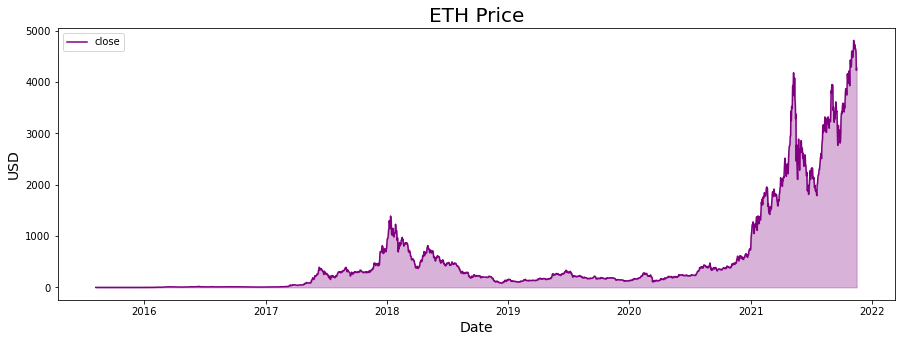

In [23]:
df = eth_price
colnms = df.columns[4:5]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('ETH Price', fontsize=20)
plt.legend()

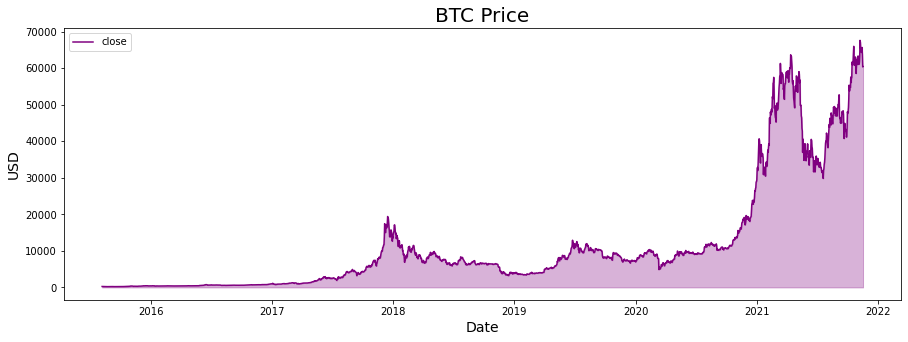

In [24]:
df = btc_price
colnms = df.columns[4:5]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('BTC Price', fontsize=20)
plt.legend()

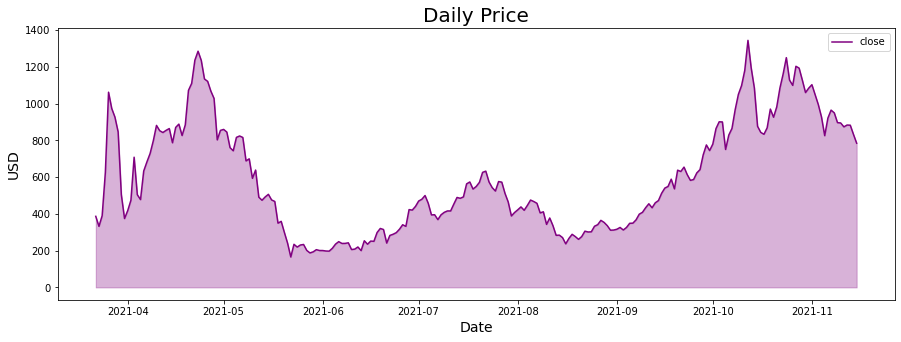

In [25]:
df = daily_price
colnms = df.columns[4:5]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Daily Price', fontsize=20)
plt.legend()

In [26]:
market_cap.tail(3)

,time,market_cap
2,2021-11-10,3.728882e+09
1,2021-11-11,3.679713e+09
0,2021-11-12,3.761966e+09


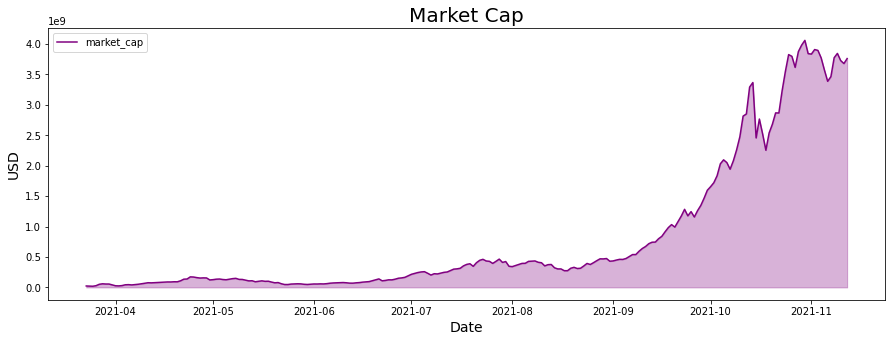

In [27]:
df = market_cap
colnms = df.columns[1:]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Market Cap', fontsize=20)
plt.legend()

In [28]:
ohm_supply.tail(3)

,time,open,high,low,close,market_cap,supply
232,2021-11-10,897.52,927.44,872.85,894.71,3.728882e+09,4.167699e+06
233,2021-11-11,889.59,928.64,865.96,873.59,3.679713e+09,4.212174e+06
234,2021-11-12,874.53,903.13,865.79,883.39,3.761966e+09,4.258556e+06


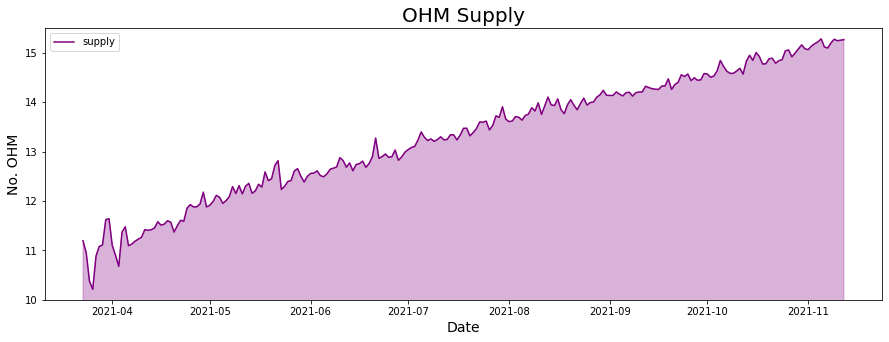

In [29]:
df = ohm_supply
colnms = df.columns[6:7]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + np.log(df[colnms[k]].values)
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('No. OHM', fontsize=14)
plt.title('OHM Supply', fontsize=20)
plt.ylim([10, 15.5])
plt.legend()

In [75]:
percent_yr = len(ohm_supply)/365

In [91]:
x = ohm_supply['supply'].values[-1]/ohm_supply['supply'].values[0]

x2Percent(x)

5749.95386334124

In [30]:
import statsmodels.api as sm

N = len(ohm_supply)
Np = 30

from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np
import random

y = np.log(ohm_supply['supply'].values)
#x = np.log(np.array(range(1,len(y)+1)))
x = np.array(range(1,len(y)+1))

X = sm.add_constant(x)
regr = sm.OLS(y, X)
fit = regr.fit()
y_hat = fit.fittedvalues
prstd, y_hat_lwr, y_hat_upr = wls_prediction_std(fit)

st, data, ss2 = summary_table(fit, alpha=0.05)

#x_new = np.log(np.array(range(N,N+Np)))
x_new = np.array(range(N,N+Np))
X_p = sm.add_constant(x_new)
pred = fit.get_prediction(X_p)

dates = ohm_supply['time'].values
dates_pred = [getDate(t,strt_date='2021-11-12') for t in range(0,Np)]

y_pred = pred.predicted_mean
y_pred_lwr = y_pred - 1.96*prstd[0]
y_pred_upr = y_pred + 1.96*prstd[0]

In [31]:
np.log(100000)

11.512925464970229

In [32]:
np.log(1000000)

13.815510557964274

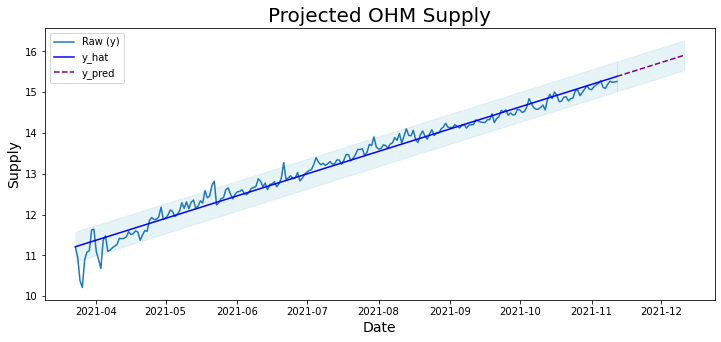

In [33]:
x = np.array(range(1,len(y)+1))
x_pred = np.array(range(2061,2061+N))

fig = plt.figure(figsize=(12,5))
ax = fig.gca()
plt.plot(dates, y, label="Raw (y)")
plt.plot(dates, y_hat, color='blue', label="y_hat")
plt.fill_between(dates, y_hat_lwr, y_hat_upr, alpha=0.3, color='lightblue')

plt.plot(dates_pred, y_pred, color='purple', linestyle='dashed', label="y_pred")
plt.fill_between(dates_pred, y_pred_lwr, y_pred_upr, alpha=0.3, color='lightblue')
plt.title("Projected OHM Supply", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Supply", fontsize=14)
plt.legend();

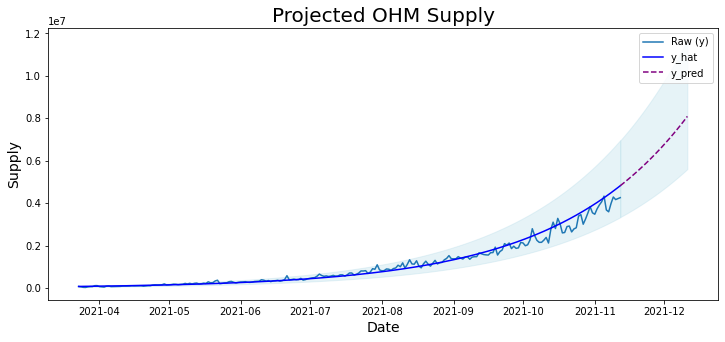

In [34]:
x = np.array(range(1,len(y)+1))
x_pred = np.array(range(2061,2061+N))

fig = plt.figure(figsize=(12,5))
ax = fig.gca()
plt.plot(dates, np.exp(y), label="Raw (y)")
plt.plot(dates, np.exp(y_hat), color='blue', label="y_hat")
plt.fill_between(dates, np.exp(y_hat_lwr), np.exp(y_hat_upr), alpha=0.3, color='lightblue')

plt.plot(dates_pred, np.exp(y_pred), color='purple', linestyle='dashed', label="y_pred")
plt.fill_between(dates_pred, np.exp(y_pred_lwr), np.exp(y_pred_upr), alpha=0.3, color='lightblue')
plt.title("Projected OHM Supply", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Supply", fontsize=14)
plt.legend();

In [35]:
market_value_treasury.head(3)

,time,treasury_mv,xsushi_mv,weth_mv,lusd_mv,frax_mv,dai_mv
138,2021-06-27,28403169.0,0.0,0.0,0.0,3105946.0,25297223.0
137,2021-06-28,28717591.0,0.0,0.0,0.0,3424527.0,25293063.0
136,2021-06-29,30391353.0,0.0,0.0,0.0,3869200.0,26522153.0


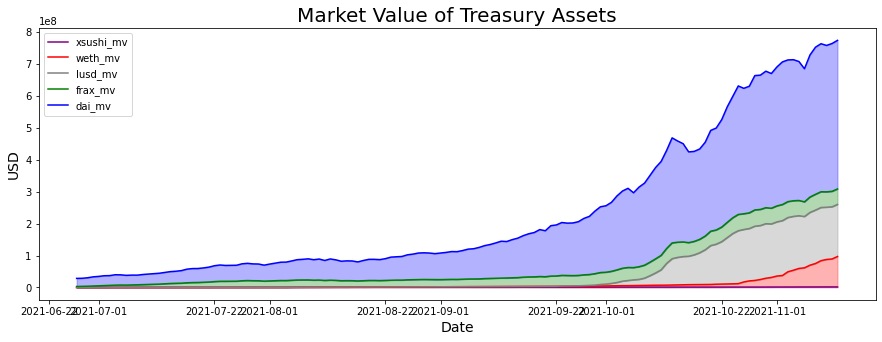

In [36]:
df = market_value_treasury
colnms = df.columns[2:]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Market Value of Treasury Assets', fontsize=20)
plt.legend()

In [37]:
risk_free_value.head(3)

,time,treasury_rfv,lusd_rfv,frax_rfv,dai_rfv
234,2021-03-23,68260,0,0,68260
233,2021-03-24,68260,0,0,68260
232,2021-03-25,68963,0,0,68963


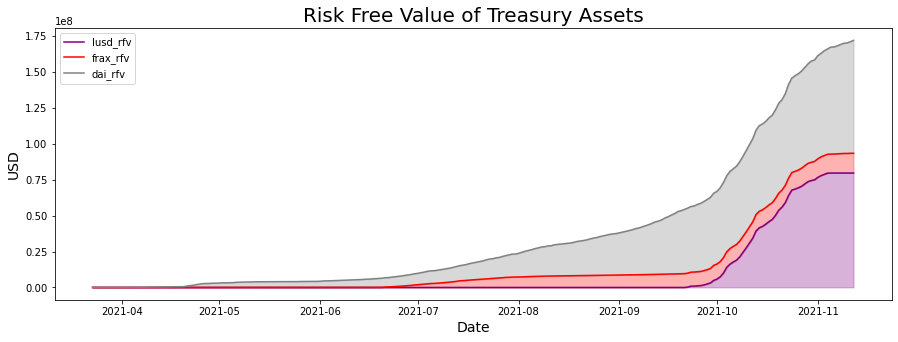

In [38]:
df = risk_free_value
colnms = df.columns[2:]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Risk Free Value of Treasury Assets', fontsize=20)
plt.legend()

In [39]:
stake_ratio.head(3)

,time,ohm_staked,ohm_not_staked
235,2021-03-22,0.000000,68260.000000
234,2021-03-23,22286.945160,36231.072818
233,2021-03-24,29634.045029,29007.752948


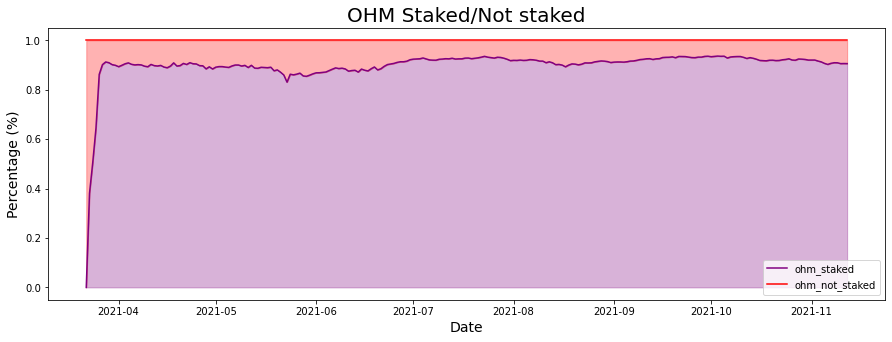

In [40]:
df = stake_ratio
colnms = df.columns[1:]
rsums = df[df.columns[1:]].sum(axis=1)
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values/rsums
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('OHM Staked/Not staked', fontsize=20)
plt.legend()  

In [41]:
holders.head(3)

,time,ohm_holders,s_ohm_holders,homies
238,2021-03-22,2,1,3
237,2021-03-23,539,258,797
236,2021-03-24,481,356,837


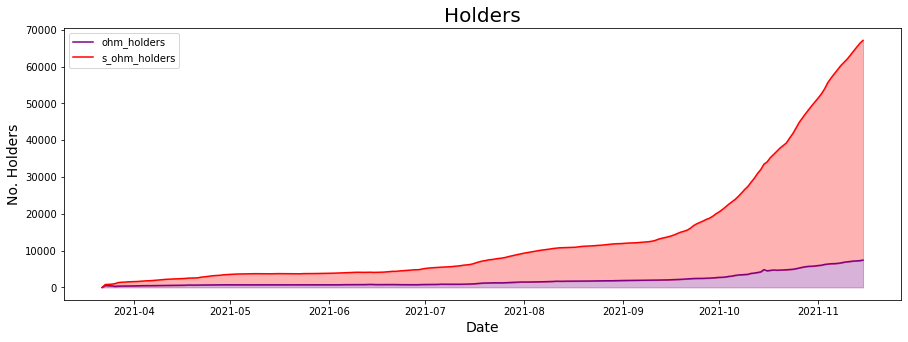

In [42]:
df = holders
colnms = df.columns[1:3]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('No. Holders', fontsize=14)
plt.title('Holders', fontsize=20)
plt.legend()

In [43]:
apy.head(3)

,time,rebase,apy
0,2021-06-16 04:34:00,0.72,249393.92
1,2021-06-16 13:19:00,0.73,293349.04
2,2021-06-16 22:02:00,0.73,280163.19


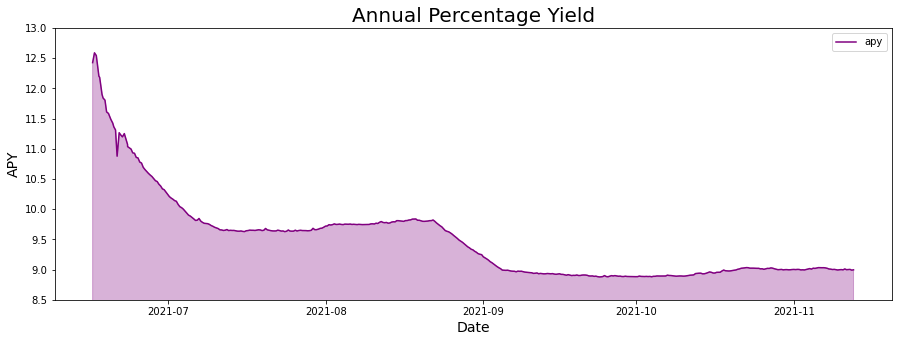

In [44]:
df = apy
colnms = df.columns[2:]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + np.log(df[colnms[k]].values)
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('APY', fontsize=14)
plt.title('Annual Percentage Yield', fontsize=20)
plt.ylim([8.5, 13])
plt.legend()

In [45]:
btc_price.head(3)

,time,open,high,low,close,volume
0,2015-08-08,261.98,268.37,260.97,266.09,23.30
1,2015-08-09,266.40,268.69,262.66,265.01,15.90
2,2015-08-10,265.35,272.79,264.92,272.04,18.23


In [46]:
eth_price.head(3)

,time,open,high,low,close,volume
0,2015-08-08,0.66,0.88,0.57,0.77,3285.0
1,2015-08-09,0.77,0.82,0.64,0.75,6474.0
2,2015-08-10,0.76,1.12,0.65,1.08,38766.0


In [47]:
BTC_HALVENING_2016 = datetime.datetime(2016, 7, 9)
BTC_HALVENING_2020 = datetime.datetime(2020, 5, 11)

ETH_MC_2016 = 5870000
BTC_MC_2016 = 114140000
COMB_MC_2016 = ETH_MC_2016 + BTC_MC_2016
COMB_SQRTMC_2016 = ETH_MC_2016**0.5 + BTC_MC_2016**0.5
ETH_MC_2020 = 15440000000
BTC_MC_2020 = 119760000000
COMB_MC_2020 = ETH_MC_2020 + BTC_MC_2020
COMB_SQRTMC_2020 = ETH_MC_2020**0.5 + BTC_MC_2020**0.5

#eth_price = eth_price.loc[eth_price['time'] >= BTC_HALVENING_2016]
#btc_price = btc_price.loc[btc_price['time'] >= BTC_HALVENING_2016]
eth_price = eth_price.loc[eth_price['time'] >= BTC_HALVENING_2020]
btc_price = btc_price.loc[btc_price['time'] >= BTC_HALVENING_2020]

bot = np.zeros(len(eth_price))
dates = eth_price['time'].values
eth_close = eth_price['close'].values
btc_close = btc_price['close'].values

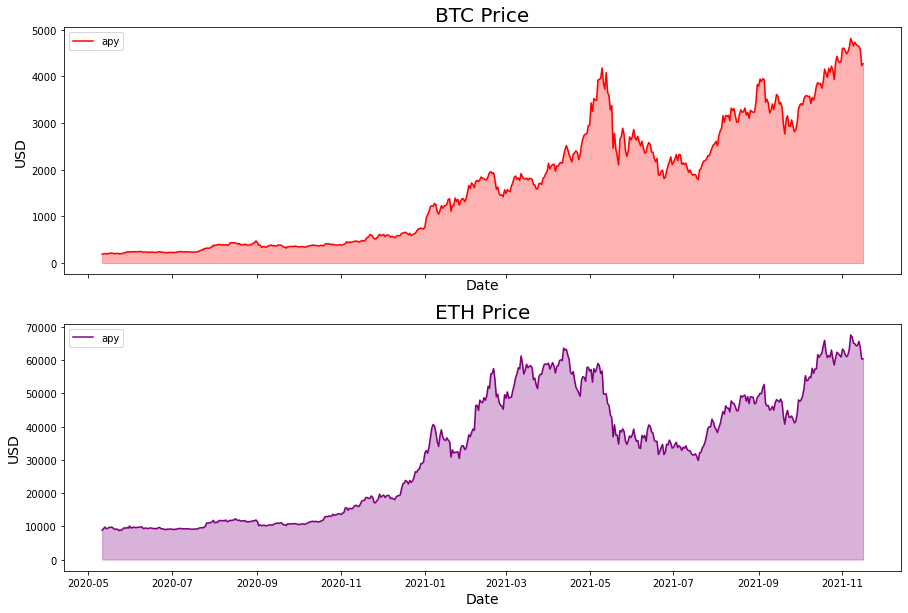

In [48]:
fig, (eth_ax, btc_ax) = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(15, 10))

btc_ax.plot(dates, btc_close, label=colnms[k],color='purple')      
btc_ax.fill_between(dates, bot, btc_close, alpha=0.3, color='purple')
btc_ax.set_xlabel('Date', fontsize=14)
btc_ax.set_ylabel('USD', fontsize=14)
btc_ax.set_title('ETH Price', fontsize=20)
btc_ax.legend()

eth_ax.plot(dates, eth_close, label=colnms[k],color='red')      
eth_ax.fill_between(dates, bot, eth_close, alpha=0.3, color='red')
eth_ax.set_xlabel('Date', fontsize=14)
eth_ax.set_ylabel('USD', fontsize=14)
eth_ax.set_title('BTC Price', fontsize=20)
eth_ax.legend()

In [49]:
#INVESTMENT*(ETH_MC_2020**0.5)/((COMB_SQRTMC_2020))

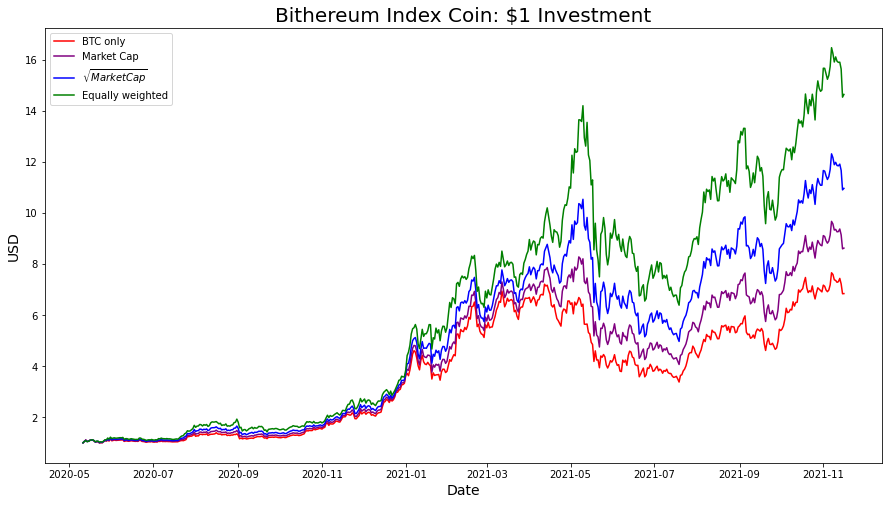

In [50]:
INVESTMENT = 1

NBTC = INVESTMENT/btc_price['close'].values[0]
NETH = INVESTMENT/eth_price['close'].values[0]
btc_investment = NBTC*btc_price['close'].values
eth_investment = NETH*eth_price['close'].values

# Market Cap Weighted
NETH_MC = INVESTMENT*ETH_MC_2020/(COMB_MC_2020*eth_price['close'].values[0])
NBTC_MC = INVESTMENT*BTC_MC_2020/(COMB_MC_2020*btc_price['close'].values[0])
mc_investment = NBTC_MC*btc_price['close'].values + NETH_MC*eth_price['close'].values

# SQRT Market Cap Weighted
NETH_MC = INVESTMENT*(ETH_MC_2020**0.5)/((COMB_SQRTMC_2020)*eth_price['close'].values[0])
NBTC_MC = INVESTMENT*(BTC_MC_2020**0.5)/((COMB_SQRTMC_2020)*btc_price['close'].values[0])
sqrt_mc_investment = NBTC_MC*btc_price['close'].values + NETH_MC*eth_price['close'].values

# 50/50 Weighted
NETH_MC = INVESTMENT/(2*eth_price['close'].values[0])
NBTC_MC = INVESTMENT/(2*btc_price['close'].values[0])
hh_investment = NBTC_MC*btc_price['close'].values + NETH_MC*eth_price['close'].values

fig = plt.figure(figsize=(15, 8))
plt.plot(dates, btc_investment, label='BTC only',color='red')   
plt.plot(dates, mc_investment, label='Market Cap',color='purple') 
plt.plot(dates, sqrt_mc_investment, label= '$\sqrt{Market Cap}$',color='blue')
plt.plot(dates, hh_investment, label='Equally weighted',color='green') 
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Bithereum Index Coin: $1 Investment', fontsize=20)
plt.legend()
fig.savefig('../img/index_coin.png')

In [51]:
# Log transform
X = np.array(range(len(sqrt_mc_investment))).reshape(-1,1)
y = sqrt_mc_investment

#### Growth ratio measures how much FXS liquidity there is against the overall supply of FRAX

In [52]:
Pz = 1 # price in USD of MCS
M = 1000 # supply of Market Coin (MC)

Z_ETH = INVESTMENT*(ETH_MC_2020**0.5)/((COMB_SQRTMC_2020)) # supply of MCS in ETH
Z_BTC = INVESTMENT*(BTC_MC_2020**0.5)/((COMB_SQRTMC_2020)) # supply of MCS in BTC

Gr = (Z_ETH+Z_BTC)*Pz/M # growth ratio

In [53]:
MC_price = sqrt_mc_investment/1000

#### Recollateralization (collateral deficit): MC shares minted

In [54]:
def mintCoin(u_col, cr, p_col, p_shares):
    coin_shares = (1-cr)*(u_col*p_col)/(cr*p_shares)
    coin = (u_col*p_col) + (coin_shares*p_shares)
    return coin_shares, coin
     
def redeemShares(u_coin, cr, p_col, p_shares):
    usd = u_coin*cr/p_col
    coin_shares = u_coin*(1-cr)/p_shares
    return usd, coin_shares

#### Arbitrage via Minting and Redeeming MC 

In [55]:
usd1 = 120
price_usd_before = 1.05
cr_before = 0.82
share_price_before = 3.65

price_usd_after = 0.95
cr_after = 0.78
share_price_after =  3.65

# mint coin (for usd and shares) @ price above $1
coin_shares1, coins_minted = mintCoin(usd1, cr_before, price_usd_before, share_price_before)
print('{:.2f} usd + {:.2f} coin shares -> {:.2f} minted coins [received]'.format(usd1, coin_shares1, coins_minted))

# redeem coin (to recieve usd and shares) @ price below $1
usd2, coin_shares2 = redeemShares(coins_minted, cr_after, price_usd_after, share_price_after)
print('{:.2f} minted coins -> {:.2f} usd + {:.2f} coin shares [received]'.format(coin_shares2, usd2, coin_shares2))

funds_before = usd1+coin_shares1*share_price_before
funds_after = usd2+coin_shares2*share_price_after
profit = funds_after - funds_before

print('{:.2f} after - {:.2f} before -> {:.2f} usd profit'.format(funds_after, funds_before, profit))


120.00 usd + 7.58 coin shares -> 153.66 minted coins [received]
9.26 minted coins -> 126.16 usd + 9.26 coin shares [received]
159.97 after - 147.66 before -> 12.31 usd profit


#### Minting and Selling FRAX @ price above \$1 [CR is decreased]

In [56]:
usd1 = 120
price_usd = 1.00
price_mc_above = 1.01
cr_before = 0.78
share_price_before = 3.65

coin_shares1, coins_minted = mintCoin(usd1, cr_before, price_mc_above, share_price_before)
print('${:.2f} + {:.2f} coin shares -> {:.2f} minted coins'.format(usd1, coin_shares1, coins_minted))
investment = usd1 + coin_shares1*share_price_before
received = coins_minted*price_mc_above
print('{:.2f} minted coins sold for ${:.2f}/coin -> ${:.2f} received value on ${:.2f} investment'.format(coins_minted,price_mc_above,received,investment))
print('                                        -> selling @ {:.2f}/coin drives price down'.format(price_mc_above))


$120.00 + 9.37 coin shares -> 155.38 minted coins
155.38 minted coins sold for $1.01/coin -> $156.94 received value on $154.18 investment
                                        -> selling @ 1.01/coin drives price down


#### Buying and Redeeming FRAX @ price below \$1 [CR is increased]

In [57]:
usd2 = 100
price_mc_below = 0.99
cr_below = 0.82
share_price_below =  3.65

coins_bought = usd2/price_mc_below
print('{:.2f} coins bought for ${:.2f}/coin for ${:.2f}'.format(coins_bought,price_mc_below,usd2))

usd_redeem, coin_shares = redeemShares(coins_bought, cr_below, price_mc_below, share_price_below)
print('{:.2f} redeemed coins -> ${:.2f} + {:.2f} coin shares'.format(coins_bought, usd_redeem, coin_shares))
print('                      -> ${:.2f} received value on ${:.2f} investment'.format(usd_redeem + coin_shares*share_price_below,usd2))
print('                      -> buying @ {:.2f}/coin drives price UP'.format(price_mc_below))



101.01 coins bought for $0.99/coin for $100.00
101.01 redeemed coins -> $83.66 + 4.98 coin shares
                      -> $101.85 received value on $100.00 investment
                      -> buying @ 0.99/coin drives price UP


#### Minting and Selling MC @ price above \$1 [CR is decreased]

In [58]:
index_coin = 100
price_fic_above = 1.02
cr_before = 0.78
share_price_before = 1.65

usd_index_coin = 10
ic = superscript_map["ic"]
fic = superscript_map["fic"]

x_shares, f_index_coin = mintCoin(index_coin, cr_before, price_mc_above, share_price_before)
print('{:.2f}{} + {:.2f} xs -> {:.2f}{} minted'.format(index_coin, ic, x_shares, f_index_coin,fic))
investment = index_coin + x_shares*share_price_before
received = f_index_coin*price_mc_above
profit_index_coin = received-investment
profit = profit_index_coin*usd_index_coin

print('{:.2f}{} sold for {:.2f}{}/FIC -> {:.2f}{} received value on {:.2f}{} investment'.format(f_index_coin,fic,price_fic_above,ic,received,ic,investment,ic))
print('                            -> profit of {:.2f}{} index coin -> ${:.2f}'.format(profit_index_coin,ic,profit))
print('                            -> selling @ {:.2f}{}/FIC drives price down'.format(price_fic_above,ic))


100.00ᶦᶜ + 17.26 xs -> 129.49ᶠᶦᶜ minted
129.49ᶠᶦᶜ sold for 1.02ᶦᶜ/FIC -> 130.78ᶦᶜ received value on 128.49ᶦᶜ investment
                            -> profit of 2.29ᶦᶜ index coin -> $22.95
                            -> selling @ 1.02ᶦᶜ/FIC drives price down


#### Buying and Redeeming MC @ price below \$1 [CR is increased]

In [59]:
index_coin = 100
price_fic_below = 0.98
cr_below = 0.82
share_price_below =  3.65

f_index_coin = index_coin/price_fic_below
print('{:.2f}{} bought for {:.2f}{}/fic for {:.2f}{}'.format(f_index_coin,fic,price_fic_below,ic,index_coin,ic))

ic_redeem, x_shares = redeemShares(f_index_coin, cr_below, price_fic_below, share_price_below)
print('{:.2f}{} redeemed -> {:.2f}{} + {:.2f} xs'.format(f_index_coin, fic, ic_redeem, ic, x_shares))
investment = index_coin
received = ic_redeem + x_shares*share_price_below
profit_index_coin = received-investment
profit = profit_index_coin*usd_index_coin

print('                  -> {:.2f}{} received value on {:.2f}{} investment'.format(received,ic,index_coin,ic))
print('                  -> profit of {:.2f}{} index coin -> ${:.2f}'.format(profit_index_coin,ic,profit))
print('                  -> buying @ {:.2f}{}/coin drives price UP'.format(price_fic_below,ic))


102.04ᶠᶦᶜ bought for 0.98ᶦᶜ/fic for 100.00ᶦᶜ
102.04ᶠᶦᶜ redeemed -> 85.38ᶦᶜ + 5.03 xs
                  -> 103.75ᶦᶜ received value on 100.00ᶦᶜ investment
                  -> profit of 3.75ᶦᶜ index coin -> $37.48
                  -> buying @ 0.98ᶦᶜ/coin drives price UP


In [60]:
N = len(y)
CI = 0.95
sigma = 0.01
mu = np.ones(N)
rindex = y[:N]
findex = np.random.normal(mu, sigma)
upr_ithres = norm.ppf(1-(1-CI)/2, loc=mu, scale=sigma)
lwr_ithres = norm.ppf((1-CI)/2, loc=mu, scale=sigma)

upr_ithres = norm.ppf(1-(1-CI)/2, loc=mu, scale=sigma)
lwr_ithres = norm.ppf((1-CI)/2, loc=mu, scale=sigma)

findex_coin = findex*rindex
lwr_thres = rindex*lwr_ithres
upr_thres = rindex*upr_ithres 

### Recollateralization

In [61]:
def recollateralization(fic_supply,cr,cr_peg,xs_price):
    collateral_needed = round(fic_supply*abs(cr-cr_peg),2)
    fxs_received = (collateral_needed*1)*(1+0.0075)/xs_price
    return fxs_received, collateral_needed  

In [62]:
fic_supply = 100000000
cr = 0.5025
cr_peg = 0.5
collateral = 50000000
xs_price = 3.80

collateral_needed = round(fic_supply*abs(cr-cr_peg),2)
fxs_received = (collateral_needed*1)*(1+0.0075)/xs_price
fxs_received

66282.89473684212

### Buybacks

In [63]:
VERBOSE_ARBITRAGE = True
VERBOSE_CR_BALANCE = True

fic_supply = 1000
ic_collateral = 1000
xs_supply = 800
cr = xs_supply/fic_supply
cr_peg = 0.8

ic_inv = 100
xs_price_below = 1
cr_upr = 0.81
usd_index_coin = 10

xs_price_above = 1
cr_lwr = 0.79

is_price_abv = findex > upr_ithres[:N]
is_price_blw = findex < lwr_ithres[:N]
invest = ic_inv*np.ones(N)
collateral_arr = ic_collateral*np.ones(N)
xs_arr = ic_collateral*np.ones(N)

for k in range(len(findex)):
    
    cr = xs_supply/fic_supply
    xs_arr[k] = xs_supply
    collateral_arr[k] = ic_collateral
    invest[k] = y[k]*ic_inv
    if(is_price_abv[k]):
        ic_price_above = findex[k]
        x_shares, fic_minted = mintCoin(ic_inv, cr, ic_price_above, xs_price_above) 
        investment = ic_inv + x_shares*xs_price_above
        received = fic_minted*ic_price_above
        ic_profit = received-investment    
        xs_supply -= x_shares
        ic_collateral += ic_profit
        ic_inv += ic_profit
        if(VERBOSE_ARBITRAGE): print('({}) inv from minting: {:.2f}{} // col: {:.3f}'.format(k, ic_inv,ic,cr))
         
    if(is_price_blw[k]):   
        ic_price_below = findex[k]
        fic_bought = ic_inv/ic_price_below
        ic_redeem, x_shares = redeemShares(fic_bought, cr, ic_price_below, xs_price_below)         
        investment = ic_inv
        received = ic_redeem + x_shares*xs_price_below
        ic_profit = received-investment
        ic_collateral += ic_profit
        xs_supply += x_shares
        ic_inv += ic_profit  
        if(VERBOSE_ARBITRAGE): print('({}) inv from redeeming: {:.2f}{} // col: {:.3f}'.format(k, ic_inv,ic,cr))
            
    if(cr < cr_lwr): 
        xs_received, ic_collateral_needed = recollateralization(fic_supply, cr, cr_peg, xs_price_above)
        if(VERBOSE_CR_BALANCE): print('({}) cr: {:.2f} {:.4f}'.format(k, xs_received, ic_collateral_needed))
        xs_supply += xs_received
        ic_collateral -= ic_collateral_needed
              

(4) inv from minting: 105.57ᶦᶜ // col: 0.800
(5) cr: 25.80 25.6100
(18) inv from minting: 110.60ᶦᶜ // col: 0.800
(19) cr: 26.92 26.7200
(50) inv from redeeming: 115.41ᶦᶜ // col: 0.800
(59) inv from redeeming: 121.15ᶦᶜ // col: 0.823
(68) inv from minting: 127.35ᶦᶜ // col: 0.844
(133) inv from redeeming: 134.14ᶦᶜ // col: 0.821
(169) inv from minting: 140.18ᶦᶜ // col: 0.844
(348) inv from redeeming: 145.95ᶦᶜ // col: 0.819
(389) inv from redeeming: 151.46ᶦᶜ // col: 0.845
(397) inv from redeeming: 159.13ᶦᶜ // col: 0.868
(417) inv from minting: 168.03ᶦᶜ // col: 0.889
(420) inv from minting: 175.42ᶦᶜ // col: 0.868
(427) inv from minting: 183.70ᶦᶜ // col: 0.842
(436) inv from minting: 193.52ᶦᶜ // col: 0.809
(437) cr: 36.24 35.9700
(455) inv from minting: 203.37ᶦᶜ // col: 0.800
(456) cr: 49.48 49.1100
(467) inv from minting: 214.03ᶦᶜ // col: 0.800
(468) cr: 51.92 51.5300
(472) inv from redeeming: 222.28ᶦᶜ // col: 0.800
(489) inv from minting: 232.92ᶦᶜ // col: 0.844
(543) inv from minting: 244.2

In [64]:
st = 350
N = 555
N = 440

bot_raw_index = min(rindex[st:N])
top_raw_index = max(rindex[st:N])

bot_invest = min(invest[st:N])
top_invest = max(invest[st:N])

ind_bot_index = np.where(bot_raw_index == rindex[st:N])[0][0]+st
ind_top_index = np.where(top_raw_index == rindex[st:N])[0][0]+st

ind_bot_invest = np.where(bot_invest == invest[st:N])[0][0]+st
ind_top_invest = np.where(top_invest == invest[st:N])[0][0]+st

drop_index = 100*(top_raw_index - bot_raw_index)/ top_raw_index
drop_invest = 100*(top_invest - bot_invest)/ top_invest

print('{:.2f}% drop in index coin vs. {:.2f}% drop in investment'.format(drop_index, drop_invest))

52.84% drop in index coin vs. 46.70% drop in investment


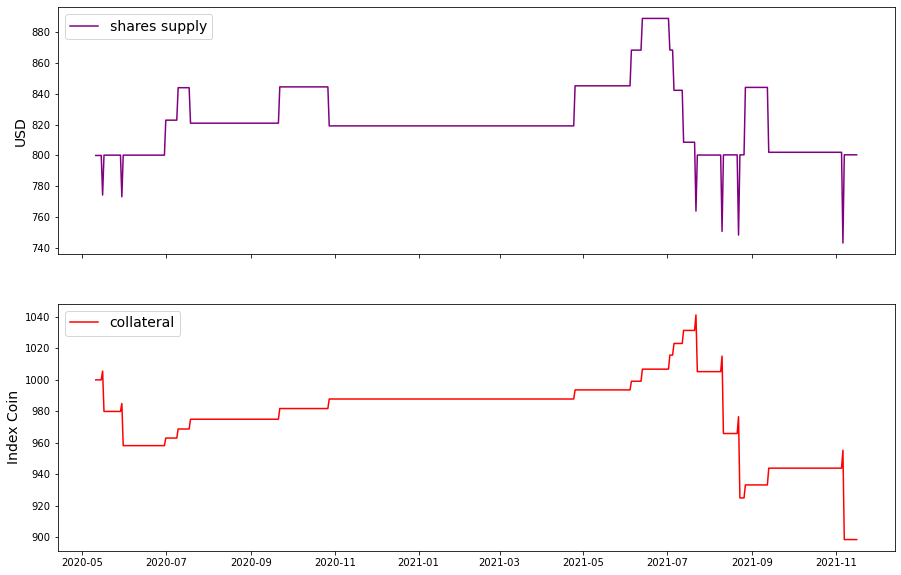

In [65]:
st = 0
N = 555

t = np.array(range(N))

fig, (shares_ax, col_ax) = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(15, 10))

shares_ax.plot(dates[st:N], xs_arr[st:N], label='shares supply',color='purple') 
shares_ax.set_ylabel('USD', fontsize=14)

legend = shares_ax.legend(loc='upper left', fontsize=14);

col_ax.plot(dates[st:N], collateral_arr[st:N], label='collateral',color='red') 
col_ax.set_ylabel('Index Coin', fontsize=14)
legend = col_ax.legend(loc='upper left', fontsize=14);

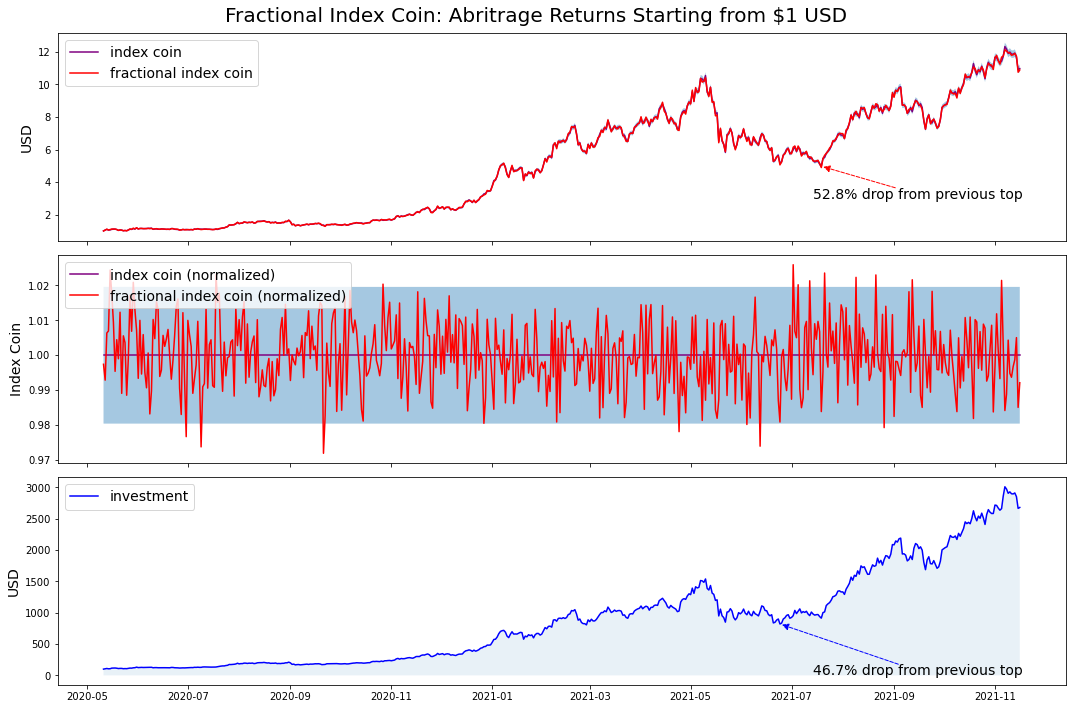

In [66]:
st = 0
N = 555

t = np.array(range(N))

fig, (usd_ax, ic_ax, inv_ax) = plt.subplots(nrows=3, sharex=True, sharey=False, figsize=(15, 10))

usd_ax.plot(dates[st:N], rindex[st:N], label='index coin',color='purple') 
usd_ax.plot(dates[st:N], findex_coin[st:N], label='fractional index coin',color='red')  
usd_ax.set_ylabel('USD', fontsize=14)
usd_ax.fill_between(dates[st:N], lwr_thres[st:N], upr_thres[st:N], alpha=0.4)

usd_ax.annotate('{:.1f}% drop from previous top'.format(drop_index), 
                    xy=(dates[ind_bot_index],bot_raw_index), 
                    xytext=(dates[ind_bot_invest+20],3),             
                    arrowprops=dict(arrowstyle= '-|>', color='red', lw=1, ls='--'), 
                    bbox=dict(boxstyle='square,pad=-0.07', fc='none', ec='none'),
                    fontsize=14)

legend = usd_ax.legend(loc='upper left', fontsize=14);

ic_ax.plot(dates[st:N], mu[st:N], label='index coin (normalized)',color='purple') 
ic_ax.plot(dates[st:N], findex[st:N], label='fractional index coin (normalized)',color='red') 
ic_ax.set_ylabel('Index Coin', fontsize=14)
ic_ax.fill_between(dates[t[st:N]], lwr_ithres[st:N], upr_ithres[st:N], alpha=0.4)
legend = ic_ax.legend(loc='upper left', fontsize=14);

inv_ax.plot(dates[st:N], invest[st:N], label='investment',color='blue')  
inv_ax.set_ylabel('USD', fontsize=14)
inv_ax.fill_between(dates[st:N], np.zeros(N)[st:N], invest[st:N], alpha=0.1)

inv_ax.annotate('{:.1f}% drop from previous top'.format(drop_invest), 
                    xy=(dates[ind_bot_invest],bot_invest), 
                    xytext=(dates[ind_bot_invest+20],8),             
                    arrowprops=dict(arrowstyle= '-|>', color='blue', lw=1, ls='--'), 
                    bbox=dict(boxstyle='square,pad=-0.07', fc='none', ec='none'),fontsize=14)

legend = inv_ax.legend(loc='upper left', fontsize=14);

fig.suptitle('Fractional Index Coin: Abritrage Returns Starting from $1 USD',fontsize=20)
fig.tight_layout()

fig.savefig('../img/fractional_index_coin.png')

#### Buybacks (collateral surplus) : MC shares burned